In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("archives/creditcard.csv")

In [3]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


<Axes: xlabel='Class', ylabel='count'>

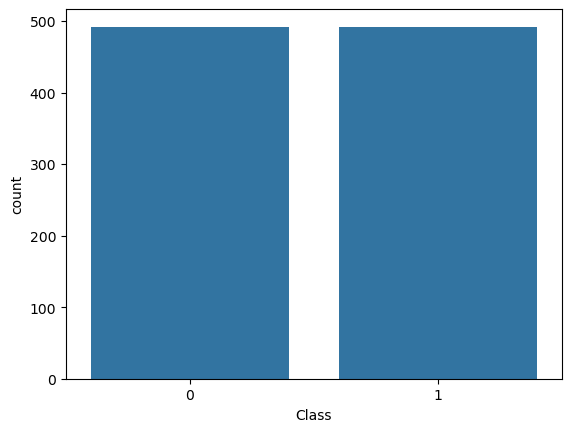

In [4]:
from sklearn.model_selection import train_test_split

fraud = df[df['Class'] == 1]

# hacemos un dataset de entrenamiento con el mismo numero de fraudes que no fraudes
df_f = pd.concat([df[df['Class']==1], 
                      df[df['Class']==0].sample(int(len(fraud)),random_state=42)])

# Borramos del dataset los datos que vamos a utilizar para entrenar
df = df[~df.isin(df_f).all(1)]

# Reordenamos los datos
df_f = df_f.sample(frac=1)

X_test = df_f.drop("Class",axis=1)
y_test = df_f['Class']

# Dividimos los datos para el entrenamiento
X_train, X_val, y_train, y_val = train_test_split(df.drop("Class",axis=1), df['Class'], 
                                                  test_size=0.2,random_state=42)

sns.countplot(data=df_f,x='Class')

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

def scaler(x, y):

    s = sc.fit_transform(x, y)
    return s[:,0], s[:,1]


X_train["Time"],X_train["Amount"] = scaler(X_train,['Time','Amount'])
X_val["Time"],X_val["Amount"] = scaler(X_val,['Time','Amount'])
X_test["Time"],X_test["Amount"] = scaler(X_test,['Time','Amount'])

fraud["Time"],fraud["Amount"] = scaler(fraud,['Time','Amount'])

fraud = fraud.drop("Class",axis=1)
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
541,-1.681237,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.362963
623,-1.679856,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,0.255048
4920,-1.596360,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.364273
6108,-1.543542,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,0.055185
6329,-1.532388,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,0.886287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,1.849785,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,0.419677
280143,1.854075,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.907584
280149,1.854159,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,0.604387
281144,1.867029,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.244676


In [6]:
from tensorflow import keras

encoder = keras.models.Sequential([
    keras.layers.Dense(50, activation="relu", input_shape=[X_train.shape[1]]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(5, activation="relu")
])
encoder.summary()

c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │         1,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │            80 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,625 (14.16 KB)

 Trainable params: 3,625 (14.16 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
X_train.shape[1]

30

In [8]:
decoder = keras.models.Sequential([
    keras.layers.Dense(15, input_shape=[5], activation="relu"),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(X_train.shape[1]),
])
decoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 15)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │         1,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 30)             │         1,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,650 (14.26 KB)

 Trainable params: 3,650 (14.26 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
autoencoder = keras.models.Sequential([encoder, decoder])
autoencoder.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 5)              │         3,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 30)             │         3,650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,275 (28.42 KB)

 Trainable params: 7,275 (28.42 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
autoencoder.compile(loss="mse", optimizer="adam")

In [11]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

history = autoencoder.fit(X_train,X_train, epochs=10,
                          validation_data=[X_val, X_val],callbacks=[early_stopping_cb])

Epoch 1/10
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.5445 - val_loss: 0.3374
Epoch 2/10
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.3359 - val_loss: 0.3111
Epoch 3/10
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.3056 - val_loss: 0.2988
Epoch 4/10
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.2882 - val_loss: 0.2789
Epoch 5/10
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.2744 - val_loss: 0.2647
Epoch 6/10
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.2640 - val_loss: 0.2606
Epoch 7/10
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.2555 - val_loss: 0.2491
Epoch 8/10
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.2509 - val_loss: 0.2471
Epoch 9/10
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.2443 - val_loss: 0.2433
Epoch 10/10
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.2455 - val_loss: 0.2425


<Axes: >

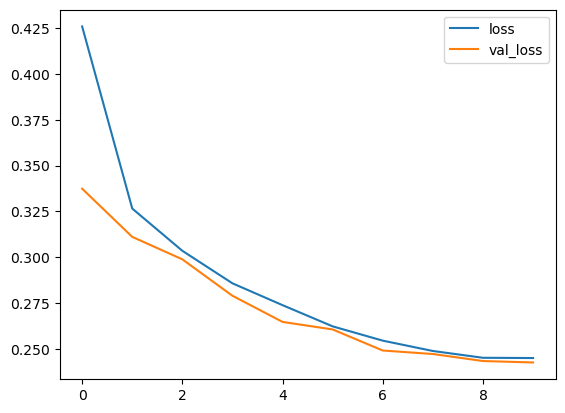

In [12]:
pd.DataFrame(history.history).plot()

In [13]:
autoencoder.evaluate(X_test,X_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.1026 


3.189434766769409

In [14]:
from sklearn.metrics import mean_squared_error

predict = autoencoder.predict(fraud)

mse_values_error = [np.sqrt(mean_squared_error([true_val], [pred_val])) for true_val, pred_val in zip(fraud.values, predict)]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [15]:
mse_values_error[:10]

[1.0649624356871528,
 0.9379276279485406,
 1.6002992908236902,
 1.9289554992334093,
 1.0915312494459122,
 2.4944471201016545,
 2.447981991123122,
 2.766798951854814,
 2.747885581018077,
 1.3448688416147974]

In [16]:
st_fraud = np.std(mse_values_error)
st_fraud

1.6394801969481019

In [17]:
x = X_val

predict = autoencoder.predict(x)

mse_values = [np.sqrt(mean_squared_error([true_val], [pred_val])) for true_val, pred_val in zip(x.values, predict)]

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [18]:
mse_values[:10]

[0.3786058182430751,
 0.42041441349231523,
 0.29821173158426767,
 0.48436670979370045,
 0.6654217602216875,
 0.47021613349731983,
 0.5422922656527807,
 0.7942290463684468,
 0.25531818604713774,
 0.46930798929918277]

In [19]:
st_val = np.std(mse_values)
st_val

0.21272313965434375

In [20]:
media_fraud = np.mean(mse_values_error)
media_val = np.mean(mse_values)

z = (media_fraud - media_val)/(st_fraud + st_val)
frontera = media_val + z*st_val

def detectar_fraude(predict,value):
    error = np.sqrt(mean_squared_error(predict,value))
    return error > frontera

predict = autoencoder.predict(X_test)

errores = [detectar_fraude(pred_val, true_val) for true_val, pred_val in zip(X_test.values,predict)]

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


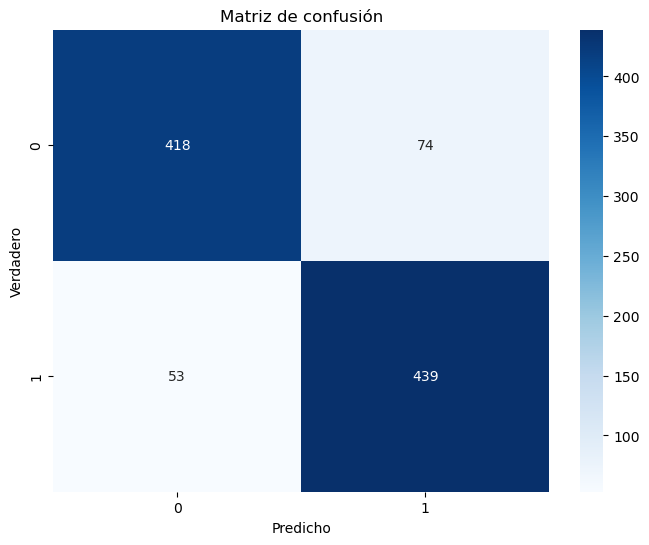

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, errores)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.title('Matriz de confusión')
plt.show()